## 개념 정리
### 용어 정리
- 다중회귀: 여러 개의 특성을 사용한 선형 회귀. 특성이 많으면 성능이 좋아지나, 과대적합의 위험성 또한 존재함.
- 특성공학: 기존의 특성을 활용해 새로운 특성을 뽑아내는 작업
- 규제: 모델이 과도하게 학습되는 것을 방지하는 역할 -> 과대적합 방지
    - 예시) 선형모델의 규제는, 특성에 곱해지는 계수나 기울기를 작게 만드는 것
- 릿지 회귀: 계수를 제곱한 값을 기준으로 규제를 적용
- 라쏘 회귀: 계수의 절대값을 기준으로 규체를 적용
    - 알파값에 따라, 규제의 정도를 조절할 수 있음. 
        - 값이 크면 계수를 더 줄이고 괴소적합이 되도록 유도함. 
        - 값이 작으면 계수를 줄이는 역할이 줄어들고 과대적합될 가능성이 높아짐
    - 적절한 알파값은 알파값에 대한 R^2을 직접 그려보면서 찾아야 함

### 핵심 패키지와 함수 (pandas)
- read_csv()
    - CSV 파일을 로컬, 네트워크에서 읽어 Pandas DataFrame으로 변환하는 함수
    - sep: CSV 파일의 구분자를 지정. 기본값은 콤마(,).
    - header: DataFrame의 열 이름으로 사용할 CSV파일의 행 번호를 지정. 기본적으로 첫번째 행을 열이름으로 사용.
    - skiprows: 파일에서 읽기 전에 건너뛸 행의 갯수를 지정.
    - nrows: 파일에서 읽을 행의 갯수를 지정.

### 핵심 패키지와 함수 (sklearn)
- 변환기: 특성을 만들거나 전처리하기 위한 sklearn클래스들
    - fit(): 새롭게 만들 특성 조합을 찾음
    - transform(): 실제로 데이터를 변환
- PolynomialFeatures
    - 주어진 특성을 조합하여 새로운 특성을 만듦
    - degree: 최고차수를 지정함. 기본값은 2.
    - include_bias: False이면, 절편을 위한 특성을 추가하지 않음. 기본값은 True.
- Ridge / Lasso
    - alpha: 규제의 강도를 조절. 값이 클수록 규제가 강해짐
    - random_state: numpy 난수 시드값을 지정할 수 있음
    - max_iter: 알고리즘의 수행 반복 횟수를 지정. 기본값은 1000. (Lasso만 존재)

In [20]:
'''데이터 입력 받고, 분리하기'''
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# pandas(read_csv)를 이용해 입력받기
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

# 농어 무게 저장하기
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

# 학습셋, 테스트셋 분리하기
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [15]:
'''데이터 변환하기: PolynomialFeatures'''
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures() # 특성을 제곱한 항과 특성끼리 곱한 항을 추가함
poly.fit([[2,3]]) # 새롭게 만들 특성 조합을 찾음
print(poly.transform([[2,3]])) # 실제 데이터를 변환

# 특성 변환에서 1이 나타난 것은 절편값을 의미함.
# include_bias = False를 이용하여, 절편값을 없앨 수 있음
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

# train_input의 특성을 변환
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

# 특성이 어떤 입력의 조합으로 만들어졌는지 알 수 있음
poly.get_feature_names()

# 테스트셋의 특성을 변환
test_poly = poly.transform(test_input)

[[1. 2. 3. 4. 6. 9.]]
[[2. 3. 4. 6. 9.]]
(42, 9)


In [19]:
# 다중 회귀 모델 훈련하기
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(train_poly, train_target)
print(LR.score(train_poly, train_target))
print(LR.score(test_poly, test_target))

# 5제곱까지 특성을 변환
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)
# 위에서 만든 특성을 이용해, 학습
LR.fit(train_poly, train_target)
print(LR.score(test_poly, test_target)) # 훈련셋의 특성이 커지면, 훈련결과가 좋아지지만, 과대적합의 우려도 있다.

0.9999999999957028
-144.40508211356158
(42, 55)
-144.40508211356158


In [22]:
'''데이터 변환하기: StandardScaler(정규화: 특성을 일정한 범위로 제한함)'''
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS.fit(train_poly)
train_scaled = SS.transform(train_poly)
test_scaled = SS.transform(test_poly)

0.9896101671037343
0.9790693977615393


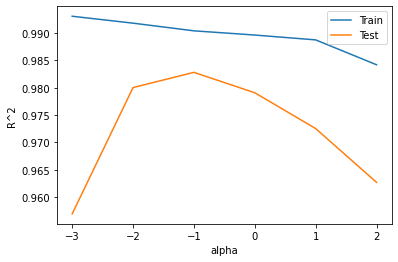

0.9903815817570365
0.9827976465386882


In [30]:
'''릿지 회귀'''
# 모델 학습하기
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

# 모델 시각화
import matplotlib.pyplot as plt
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
       ridge = Ridge(alpha=alpha)
       ridge.fit(train_scaled, train_target)
       train_score.append(ridge.score(train_scaled, train_target))
       test_score.append(ridge.score(test_scaled, test_target))

# 알파값에 따른 결정계수값 시각화
plt.plot(np.log10(alpha_list), train_score, label = 'Train')
plt.plot(np.log10(alpha_list), test_score, label = "Test")
plt.legend()
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

# 균형을 맞추는 모델
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.989789897208096
0.9800593698421884


/Users/gimdong-yeong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792087, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
/Users/gimdong-yeong/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345402686, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(


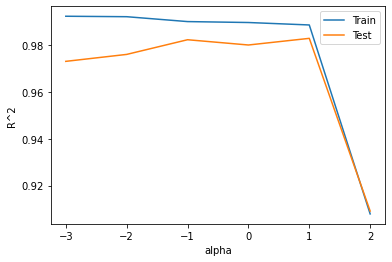

0.9888067471131867
0.9824470598706695
40
[ 0.          0.          0.         12.14852453 55.44856399 42.23100799
  0.          0.         13.70596191  0.         43.2185952   5.7033775
 47.46254536  7.42309425 11.85823365  0.          0.         13.53038193
 21.22111356  0.          0.          0.          0.          0.
  0.         18.66993032  0.          0.          0.         15.81041778
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         18.14672268  0.          0.          0.
  0.         15.51272953  0.          0.          0.          0.
  0.        ]


AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [40]:
'''라쏘 회귀'''
# 모델 학습하기
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

# 모델 시각화
import matplotlib.pyplot as plt
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
       lasso = Lasso(alpha=alpha, max_iter=10000)
       lasso.fit(train_scaled, train_target)
       train_score.append(lasso.score(train_scaled, train_target))
       test_score.append(lasso.score(test_scaled, test_target))

# 알파값에 따른 결정계수값 시각화
plt.plot(np.log10(alpha_list), train_score, label = 'Train')
plt.plot(np.log10(alpha_list), test_score, label = "Test")
plt.legend()
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

# 균형을 맞추는 모델
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

# 라쏘에서 사용한 계수 중에서 0인 계수의 갯수 -> 유용한 특성을 골라내는 용도로도 사용가능함
print(np.sum(lasso.coef_ == 0))
print(lasso.coef_)